In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
df = pd.read_csv("C:\\Users\\Ali\\Desktop\\Drug.csv")

In [3]:
df

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


In [4]:
df.isna().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [5]:
df.isnull().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [6]:
df[df.duplicated()]

,Age,Sex,BP,Cholesterol,Na_to_K,Drug


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


Sex
M    104
F     96
Name: count, dtype: int64


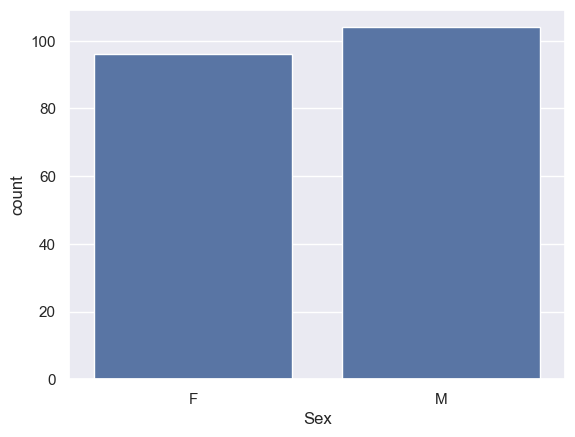

In [8]:
x = df['Sex'].value_counts()
print(x)

p = sns.countplot(data = df, x = "Sex")
plt.show()

Drug
DrugY    91
drugX    54
drugA    23
drugC    16
drugB    16
Name: count, dtype: int64


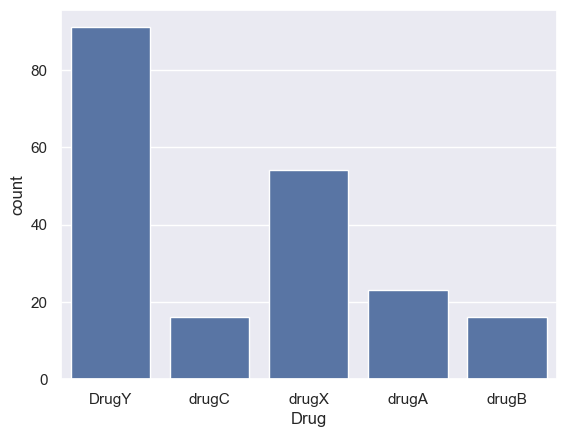

In [9]:
x = df.Drug.value_counts()
print(x)

p = sns.countplot(data = df, x = "Drug")
plt.show()

In [10]:
df['Drug'].unique()

array(['DrugY', 'drugC', 'drugX', 'drugA', 'drugB'], dtype=object)

In [11]:
from sklearn.preprocessing import OrdinalEncoder

oe = OrdinalEncoder()

df['BP'] = oe.fit_transform(df[['BP']])
df['Sex'] = oe.fit_transform(df[['Sex']])
df['Cholesterol'] = oe.fit_transform(df[['Cholesterol']])
df['Drug'] = oe.fit_transform(df[['Drug']])

In [12]:
df

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0.0,0.0,0.0,25.355,0.0
1,47,1.0,1.0,0.0,13.093,3.0
2,47,1.0,1.0,0.0,10.114,3.0
3,28,0.0,2.0,0.0,7.798,4.0
4,61,0.0,1.0,0.0,18.043,0.0
...,...,...,...,...,...,...
195,56,0.0,1.0,0.0,11.567,3.0
196,16,1.0,1.0,0.0,12.006,3.0
197,52,1.0,2.0,0.0,9.894,4.0
198,23,1.0,2.0,1.0,14.020,4.0


In [13]:
x = df.iloc[:,0:-1]
y = df.iloc[:,-1]

In [14]:
x

,Age,Sex,BP,Cholesterol,Na_to_K
0,23,0.0,0.0,0.0,25.355
1,47,1.0,1.0,0.0,13.093
2,47,1.0,1.0,0.0,10.114
3,28,0.0,2.0,0.0,7.798
4,61,0.0,1.0,0.0,18.043
...,...,...,...,...,...
195,56,0.0,1.0,0.0,11.567
196,16,1.0,1.0,0.0,12.006
197,52,1.0,2.0,0.0,9.894
198,23,1.0,2.0,1.0,14.020


In [15]:
y

0      0.0
1      3.0
2      3.0
3      4.0
4      0.0
      ... 
195    3.0
196    3.0
197    4.0
198    4.0
199    4.0
Name: Drug, Length: 200, dtype: float64

In [16]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42, test_size=0.2)

In [17]:
x_train

,Age,Sex,BP,Cholesterol,Na_to_K
79,32,0.0,1.0,1.0,10.840
197,52,1.0,2.0,0.0,9.894
38,39,0.0,2.0,1.0,9.709
24,33,0.0,1.0,0.0,33.486
122,34,1.0,2.0,0.0,22.456
...,...,...,...,...,...
106,22,1.0,2.0,0.0,11.953
14,50,0.0,2.0,0.0,12.703
92,29,0.0,0.0,0.0,29.450
179,67,0.0,2.0,0.0,15.891


In [18]:
y_train

79     4.0
197    4.0
38     4.0
24     0.0
122    0.0
      ... 
106    4.0
14     4.0
92     0.0
179    0.0
102    3.0
Name: Drug, Length: 160, dtype: float64

In [19]:
from sklearn.tree import DecisionTreeClassifier
clf_gini = DecisionTreeClassifier(criterion='gini', random_state=0)

clf_gini.fit(x_train, y_train)

y_pred_gini = clf_gini.predict(x_test)

In [20]:
y_pred_gini

array([4., 0., 4., 3., 0., 0., 0., 4., 1., 4., 1., 4., 0., 1., 2., 0., 2.,
       4., 3., 0., 2., 4., 4., 0., 0., 0., 3., 4., 0., 4., 0., 3., 3., 0.,
       1., 0., 4., 1., 0., 1.])

In [21]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_pred_gini, y_test))

1.0


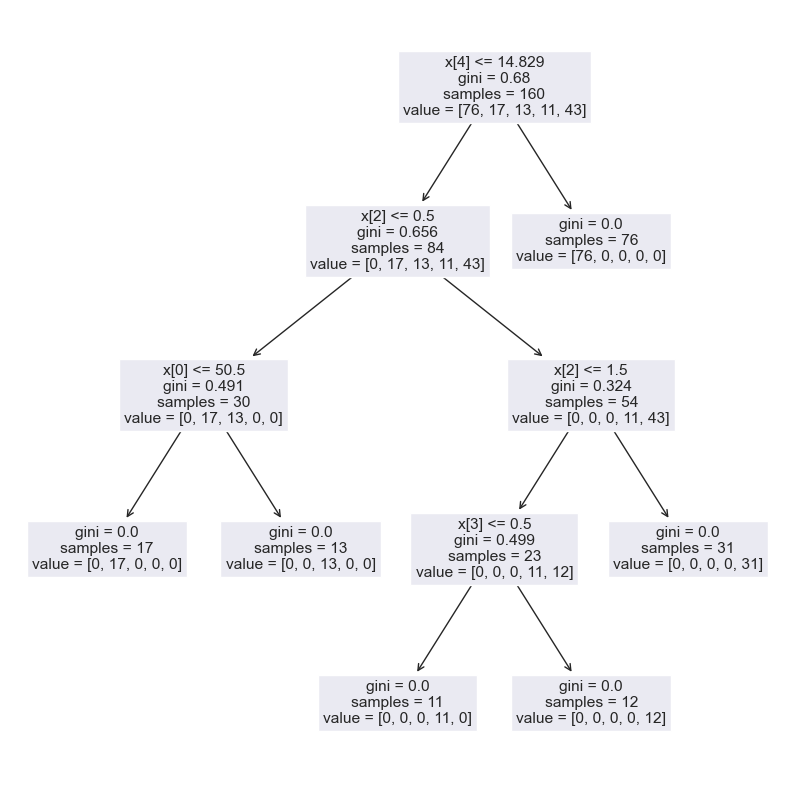

In [22]:
from sklearn import tree
plt.figure(figsize=(10,10))
tree.plot_tree(clf_gini.fit(x_train, y_train))
plt.show()

In [28]:
clf_entropy = DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=0)
clf_entropy.fit(x_train, y_train)
y_pred_entropy = clf_entropy.predict(x_test)

In [29]:
print(accuracy_score(y_test, y_pred_entropy))

1.0


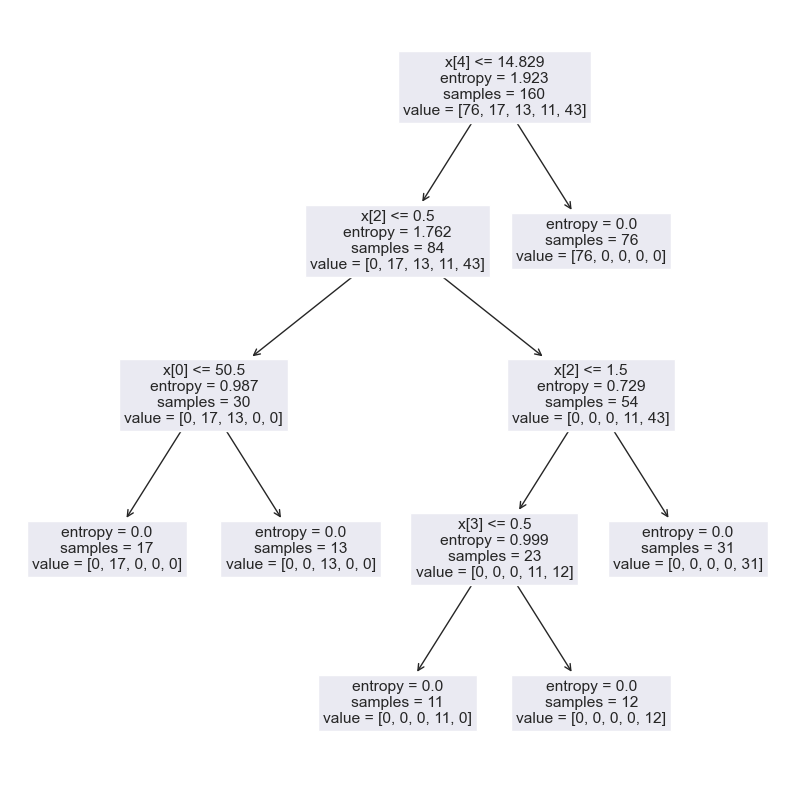

In [30]:
plt.figure(figsize=(10,10))
tree.plot_tree(clf_entropy.fit(x_train, y_train))
plt.show()


In [26]:
from sklearn.model_selection import GridSearchCV

In [27]:
# تعریف مدل درخت تصمیم
clf = DecisionTreeClassifier()

# تعریف محدوده عمق برای جستجو
param_grid = {'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}

# استفاده از GridSearchCV برای جستجوی بهترین max_depth
grid_search = GridSearchCV(clf, param_grid, cv=5)  # cv=5 یعنی 5-fold cross-validation
grid_search.fit(x_train, y_train)

# نمایش بهترین عمق و دقت مربوطه
print("بهترین عمق:", grid_search.best_params_['max_depth'])
print("بهترین دقت:", grid_search.best_score_)

بهترین عمق: 4
بهترین دقت: 0.99375
